In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import skew, kurtosis

folder_path = 'C:/1.1 Asia frequency data'
file_names = os.listdir(folder_path)

dataframes=[]
for file_name in file_names:
    file_path=os.path.join(folder_path, file_name)
    df=pd.read_csv(file_path, sep=';') 
    df.iloc[:,1]=df.iloc[:,1]/1000+50
    dataframes.append(df)

    
# dataframes[0] is Australia, [1] is Indonesia, [2] is Malaysia01, [3] is Malaysia02, [4] is Sinagpore
# combine dataframe[2] and dataframe[3]
combined_df = pd.concat([dataframes[2], dataframes[3]], ignore_index=True)

# replace dataframe[2] and dataframe[3] with combined_df in dataframes list
dataframes[2:4] = [combined_df]

# dataframes[0] is Australia
# dataframes[1] is Indonesia
# dataframes[2] is Malaysia
# dataframes[3] is Sinagpore


# Only select quality QI=0
flt_dataframes = []
for df in dataframes:
    flt_df = df[df['QI'] == 0]
    flt_dataframes.append(flt_df)
    
region_dict = {0: 'Australia', 1: 'Indonesia', 2: 'Malaysia',  3: 'Singapore'}

# Group the dataframes by region
region_groups = [df.groupby(lambda x: region_dict[i]) for i, df in enumerate(flt_dataframes)]    

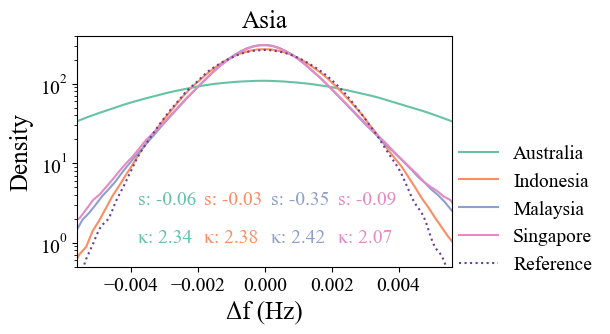

In [6]:
from numpy import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

tau=1

from numpy import random
fig, ax = plt.subplots(figsize=(6,3))

filtered_dfs = []
for i, df in enumerate(flt_dataframes):
    df_copy = df.copy()
    df_copy['increment_freq'] = df_copy.iloc[:,1].diff(periods=tau)
    filtered_data = df_copy[(df_copy['increment_freq'] >= -0.02) & (df_copy['increment_freq'] <= 0.02)]
    filtered_dfs.append(filtered_data)
    
skewness = []
kurtosis = []

for df in filtered_dfs:
    skewness.append(df['f50'].skew())
    kurtosis.append(df['f50'].kurtosis()+3)

# Plot the filtered data inside the loop
for i, df in enumerate(filtered_dfs):
    sns.kdeplot(df['increment_freq'], color=colors[i], ax=ax, label=region_dict[i])
    
# Plot normal distribution curve
sns.kdeplot(random.normal(loc=0, scale=0.0015,size=100000), color= '#6a3d9a', ax=ax, label='Reference',linestyle=":")

ax.set_title('Asia',fontsize=18)
ax.set_xlabel('\u0394f (Hz)',fontsize=18)
ax.set_ylabel('Density',fontsize=18)
ax.set_yscale('log') 

ax.set_xlim([-0.0056,0.0056])
ax.set_ylim([0.5,400])

ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

# Add skewness and kurtosis annotations
s = skewness  
k = kurtosis 

for i, (skew_val, kurt_val) in enumerate(zip(s, k)):
    ax.text(-0.0038+i*0.002, 3, f's: {skew_val.item():.2f}', color=colors[i], fontsize=14)
    ax.text(-0.0038+i*0.002, 1, f'\u03ba: {kurt_val.item():.2f}', color=colors[i], fontsize=14)

#plt.legend(fontsize=11, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(fontsize=14,bbox_to_anchor = (1.42, 0.25), loc='center right',frameon=False)

# Adjust subplot spacing
plt.subplots_adjust(right=0.75)

plt.show()
